In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

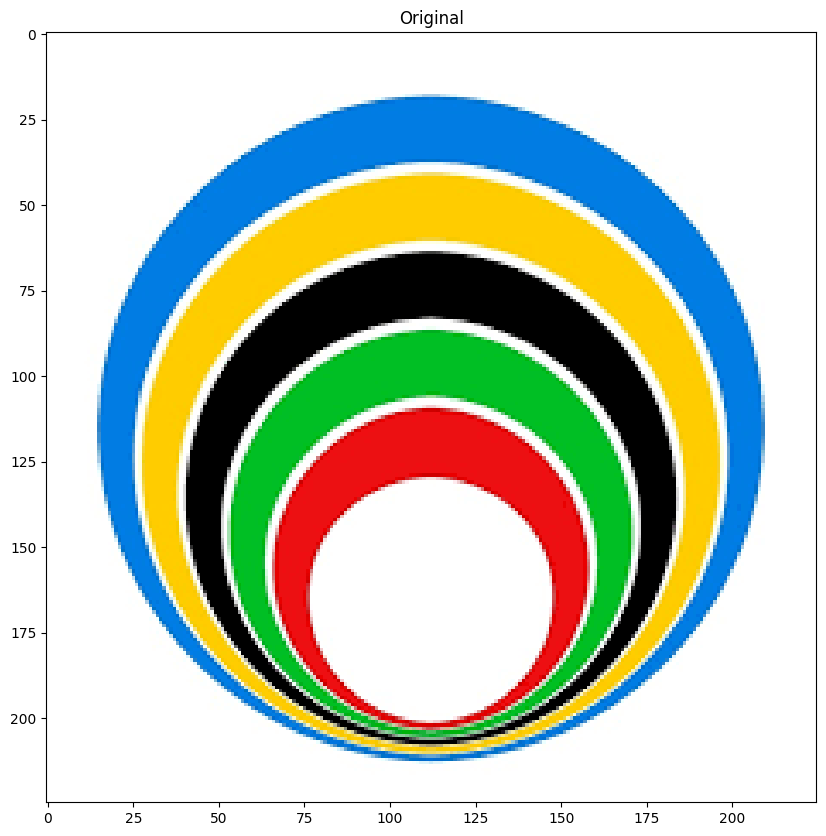

In [44]:
image = cv2.imread('coin.png')
imshow('Original' , image)

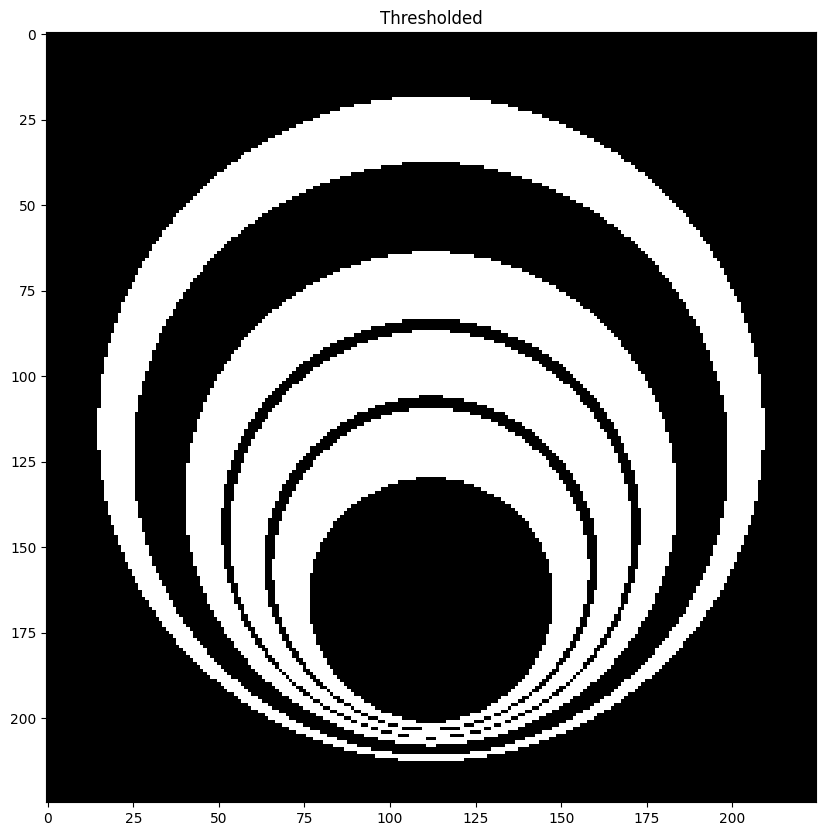

In [45]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

imshow("Thresholded", thresh)

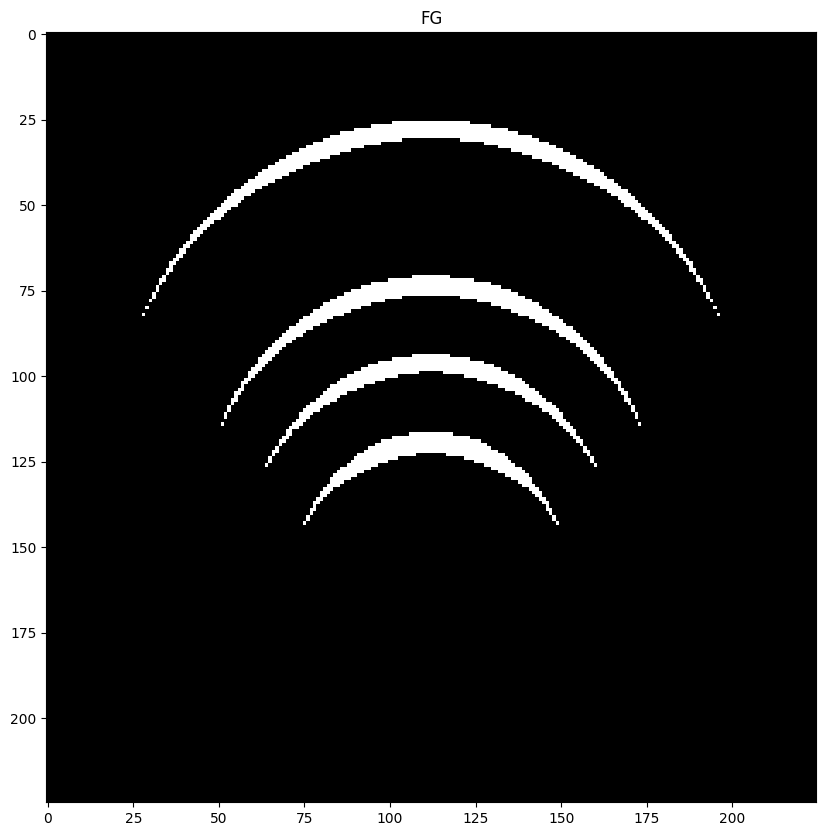

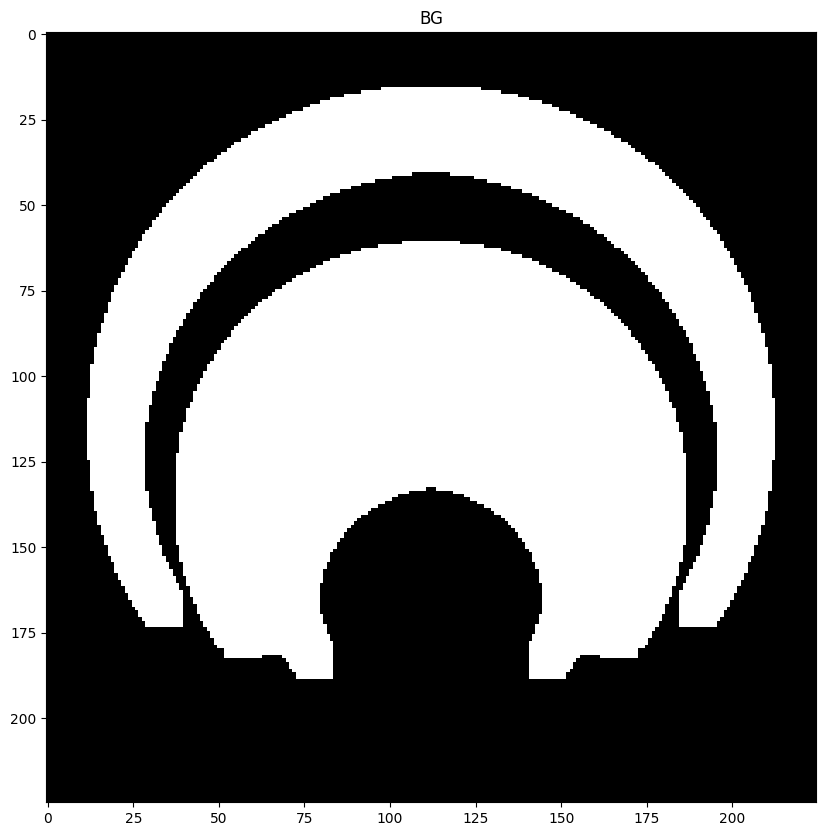

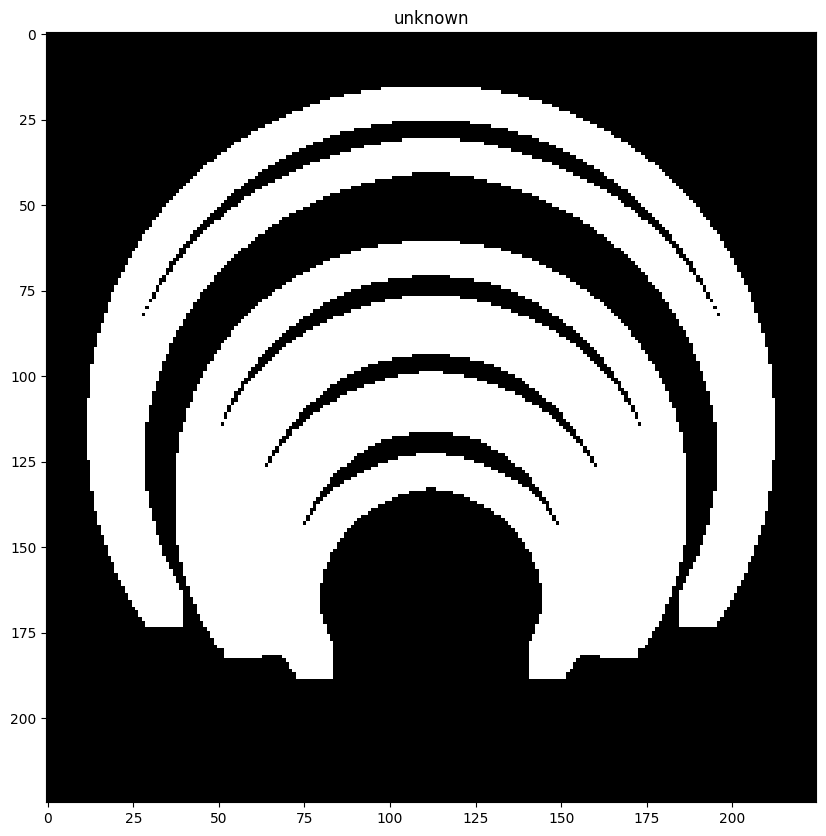

In [46]:
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

imshow("FG", sure_fg)

imshow("BG", sure_bg)

imshow("unknown", unknown)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


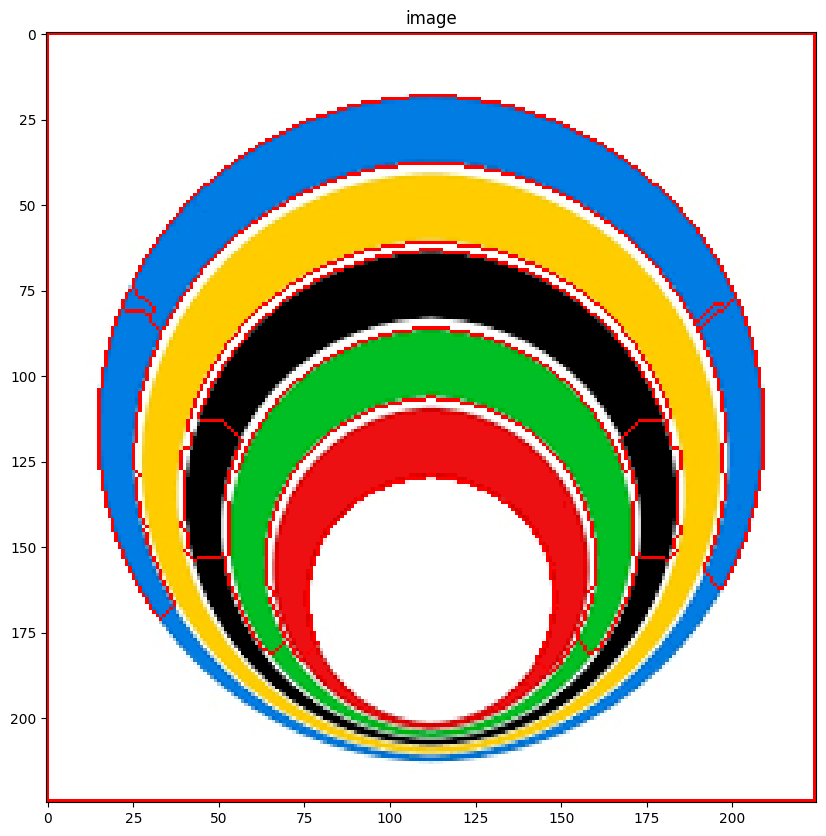

In [47]:
ret , marker = cv2.connectedComponents(sure_fg) 

marker = marker+1

marker[unknown==255] = 0

print(marker)

marker = cv2.watershed(image,marker)

image[marker==-1] = [0,0,255]

imshow('image' , image)

